### skicit-learn 中的多项式回归和 Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,size=100)

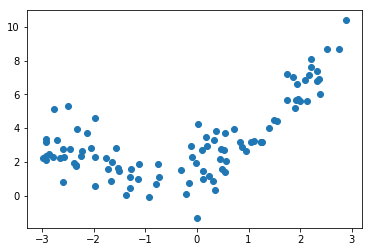

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2)

In [6]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [7]:
X2 = poly.transform(X)

In [8]:
X2[:5,:]

array([[ 1.        , -1.73278989,  3.0025608 ],
       [ 1.        , -1.76855208,  3.12777646],
       [ 1.        ,  0.36465729,  0.13297494],
       [ 1.        , -1.97716562,  3.9091839 ],
       [ 1.        ,  1.48656616,  2.20987896]])

In [9]:
X[:5,:]

array([[-1.73278989],
       [-1.76855208],
       [ 0.36465729],
       [-1.97716562],
       [ 1.48656616]])

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_predict = lin_reg.predict(X2)

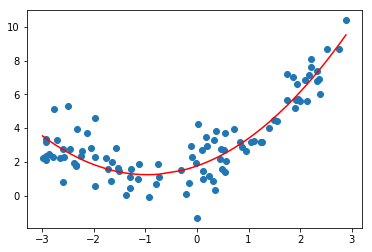

In [13]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

In [14]:
lin_reg.coef_

array([0.        , 1.07716337, 0.55920751])

In [15]:
lin_reg.intercept_

1.755783440621235

### Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [18]:
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [19]:
y_predict2 = poly_reg.predict(X)

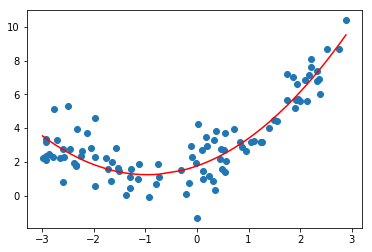

In [20]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()